In [3]:
from pyspark.sql.types import *
from pyspark.sql import SparkSession

<h3>Sales Dataframe</h3>

In [5]:
schema=StructType([
    StructField("product_id", IntegerType(), True),
    StructField("customer_id", StringType(), True),
    StructField("order_date", DateType(), True),
    StructField('location', StringType(), True),
    StructField('source_order', StringType(), True)
])

spark = SparkSession.builder.appName("SimpleApp").getOrCreate()
sales_df = spark.read.csv("data/sales.csv.txt", header=True, schema=schema)
sales_df.show(5)

<h3>Deriving year month quarter</h3>

In [7]:
from pyspark.sql.functions import *

sales_df = sales_df.withColumn("order_year", year("order_date"))
sales_df = sales_df.withColumn("order_month", month("order_date"))
sales_df = sales_df.withColumn("order_quarter", quarter("order_date"))
sales_df.show(5)

<h3>Menu dataframe</h3>

In [ ]:
schema=StructType([
    StructField("product_id", IntegerType(), True),
    StructField("product_name", StringType(), True),
    StructField("price", StringType(), True)
])

menu_df = spark.read.csv("data/menu.csv.txt", header=True, schema=schema)
menu_df.show(5)

+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|         2|     Chowmin|  150|
|         3|    sandwich|  120|
|         4|        Dosa|  110|
|         5|     Biryani|   80|
|         6|       Pasta|  180|
+----------+------------+-----+



<h3>Total amount spent by each customer</h3>

In [ ]:
total_amount_spent=(sales_df.join(menu_df,"product_id").groupBy("customer_id").agg({"price":'sum'}).orderBy("customer_id"))
total_amount_spent.show()

+-----------+----------+
|customer_id|sum(price)|
+-----------+----------+
|          A|    3960.0|
|          B|    3240.0|
|          C|    1800.0|
|          D|    1200.0|
|          E|    2040.0|
+-----------+----------+



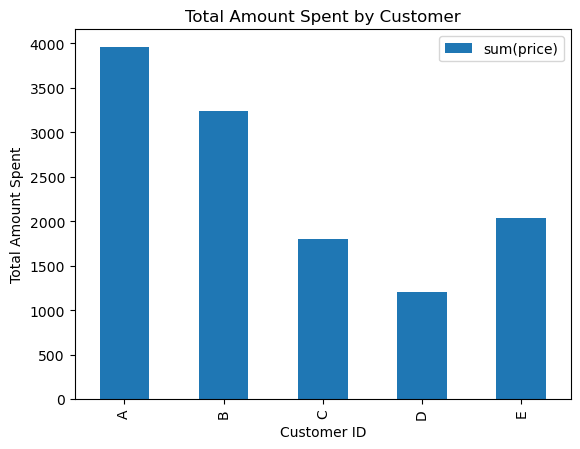

In [ ]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame
total_amount_spent_pd = total_amount_spent.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='customer_id', y='sum(price)', kind='bar')

# Set the plot title and labels
plt.title('Total Amount Spent by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')

# Show the plot
plt.show()

<h3>Total amount of sales in each month</h3>

In [ ]:
total_amount_spent_month=(sales_df.join(menu_df,"product_id").groupBy("order_month").agg({"price":'sum'}).orderBy("order_month"))
total_amount_spent_month.show()

+-----------+----------+
|order_month|sum(price)|
+-----------+----------+
|          1|    2460.0|
|          2|    2430.0|
|          3|     810.0|
|          5|    2460.0|
|          6|    2460.0|
|          7|     810.0|
|         11|     810.0|
+-----------+----------+



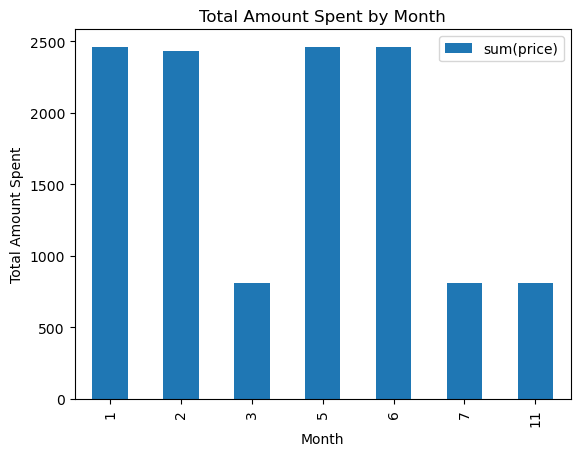

In [ ]:
# Convert the Spark DataFrame to a Pandas DataFrame
total_amount_spent_pd = total_amount_spent_month.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='order_month', y='sum(price)', kind='bar')
# Set the plot title and labels
plt.title('Total Amount Spent by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
# Show the plot
plt.show()

<h3>Yearly Sales</h3>

In [ ]:
total_amount_spent_year=(sales_df.join(menu_df,"product_id").groupBy("order_year").agg({"price":'sum'}).orderBy("order_year"))
total_amount_spent_year.show()

+----------+----------+
|order_year|sum(price)|
+----------+----------+
|      2022|    4350.0|
|      2023|    7890.0|
+----------+----------+



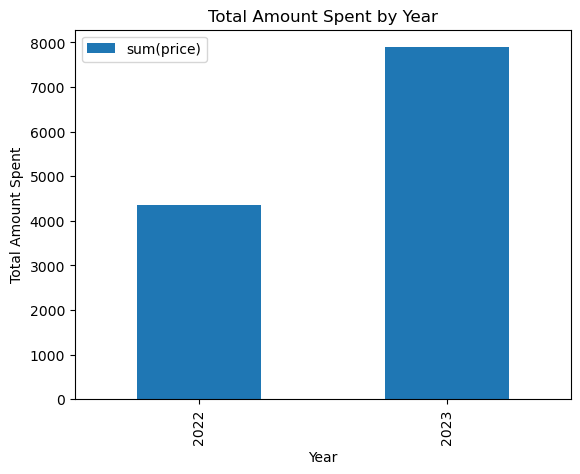

In [ ]:
total_amount_spent_pd = total_amount_spent_year.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='order_year', y='sum(price)', kind='bar')
# Set the plot title and labels
plt.title('Total Amount Spent by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
# Show the plot
plt.show()


<h3>Quarterly Sales</h3>

In [ ]:
total_amount_spent_quarter=(sales_df.join(menu_df,"product_id").groupBy("order_quarter").agg({"price":'sum'}).orderBy("order_quarter"))
total_amount_spent_quarter.show()

+-------------+----------+
|order_quarter|sum(price)|
+-------------+----------+
|            1|    5700.0|
|            2|    4920.0|
|            3|     810.0|
|            4|     810.0|
+-------------+----------+



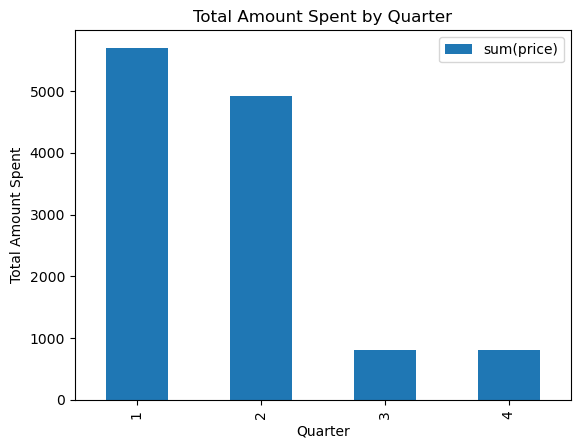

In [ ]:
total_amount_spent_pd = total_amount_spent_quarter.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='order_quarter', y='sum(price)', kind='bar')
# Set the plot title and labels
plt.title('Total Amount Spent by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Amount Spent')
# Show the plot
plt.show()

<h3>Top 5 order items</h3>

In [ ]:
top_product_id = sales_df.groupBy("product_id").count().orderBy("count", ascending=False)
top_product_id.show(5)

+----------+-----+
|product_id|count|
+----------+-----+
|         3|   48|
|         2|   24|
|         1|   20|
|         4|   12|
|         6|    6|
+----------+-----+
only showing top 5 rows



In [ ]:
top_product_id_pd = top_product_id.toPandas()

# Plot the top product IDs
top_product_id_pd.plot(x='product_id', y='count', kind='bar')
# Set the plot title and labels
plt.title('Top Product IDs')
plt.xlabel('Product ID')
plt.ylabel('Count')
# Show the plot
plt.show()

<h3>Frequency visitors</h3>

In [ ]:
top_customers = sales_df.groupBy("customer_id").agg({"product_id": "count"}).orderBy("count(product_id)", ascending=False)
top_customers.show(5)

+-----------+-----------------+
|customer_id|count(product_id)|
+-----------+-----------------+
|          B|               36|
|          A|               32|
|          E|               18|
|          C|               18|
|          D|               12|
+-----------+-----------------+



In [ ]:
top_customers_pd = top_customers.toPandas()

# Plot the top customers
top_customers_pd.plot(x='customer_id', y='count(product_id)', kind='bar')
# Set the plot title and labels
plt.title('Top Customers')
plt.xlabel('Customer ID')
plt.ylabel('Count')
# Show the plot
plt.show()


<h3>Total sales by each country</h3>

In [ ]:
top_sales_country = sales_df.groupBy("location").agg({"product_id": "count"}).orderBy("count(product_id)", ascending=False)
top_sales_country.show()

+--------+-----------------+
|location|count(product_id)|
+--------+-----------------+
|      UK|               57|
|   India|               38|
|     USA|               21|
+--------+-----------------+



In [ ]:
top_sales_country_pd = top_sales_country.toPandas()

# Plot the top sales by country
top_sales_country_pd.plot(x='location', y='count(product_id)', kind='bar')
# Set the plot title and labels
plt.title('Top Sales by Country')
plt.xlabel('Country')
plt.ylabel('Count')
# Show the plot
plt.show()


<h3>Total sales by order source</h3>

In [ ]:
total_sales_order_source = sales_df.groupBy("source_order").agg({"product_id": "count"}).orderBy("count(product_id)", ascending=False)
total_sales_order_source.show()

+------------+-----------------+
|source_order|count(product_id)|
+------------+-----------------+
|      Swiggy|               50|
|      zomato|               39|
|  Restaurant|               27|
+------------+-----------------+



In [ ]:
total_sales_order_source_pd = total_sales_order_source.toPandas()

# Plot the total sales by order source
total_sales_order_source_pd.plot(x='source_order', y='count(product_id)', kind='bar')
# Set the plot title and labels
plt.title('Total Sales by Order Source')
plt.xlabel('Order Source')

plt.ylabel('Count')
# Show the plot
plt.show()
